## **Logistic Regregression [[src](https://en.wikipedia.org/wiki/Logistic_regression)]**
In statistics, the (binary) logistic model (or logit model) is a statistical model that models the probability of one event (out of two alternatives) taking place by having the log-odds (the logarithm of the odds) for the event be a linear combination of one or more independent variables ("predictors"). In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (the coefficients in the linear combination). Formally, in binary logistic regression there is a single binary dependent variable, coded by a indicator variable, where the two values are labeled "0" and "1", while the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names.

### Cost Function:
Logistic regression uses Binary cross-entropy as its cost function. [[read more...](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)]
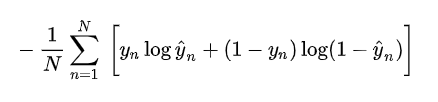
Gradients for weights and bias
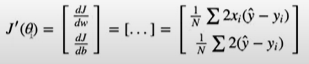

### 1. Importing Libraries

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay

### 2. Developing class for Logistic Regression

In [8]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=500):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def cost_function(self, y, y_pred):
        # Binary Cross Entropy Loss/Cost Function 
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        term_0 = (1-y) * np.log(1-y_pred + 1e-7)
        term_1 = y * np.log(y_pred + 1e-7)
        return -np.mean(term_0+term_1, axis=0)

    def fit(self, X, y):
        # 1. Initializing weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        dict_ = {"weights":[],"bias":[],"cost":[]}
        # 2. Applying gradient decent
        for i in range(self.n_iters):
            # 2.1. Making probability prediction on existing weights and bias
            #y_pred = self.predict(X)
            lr_pred = np.dot(X, self.weights) + self.bias
            y_pred = 1 / (1 + np.exp(-lr_pred))
            
            # 2.2. Gradient calculation
            dw = (1/n_samples)*(np.dot(X.T, (y_pred-y)))
            db = (1/n_samples)*(np.sum(y_pred-y))
            
            # 2.3. Updating weights
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            # 2.4 Cost computation
            cost = self.cost_function(y,y_pred)
            print(f"Weights:{self.weights} Bias:{self.bias} Cost:{cost}")
            dict_["weights"].append(self.weights)
            dict_["bias"].append(self.bias)
            dict_["cost"].append(cost)
        return dict_
            
            

    def predict(self, X):
        # Performing model prediction
        thresh = 0.5
        lr_pred = np.dot(X, self.weights) + self.bias
        y_pred_prob = 1 / (1 + np.exp(-lr_pred))
        y_pred = np.array([1 if i>thresh else 0 for i in y_pred_prob])
        return y_pred

### 3. Data Preparation

In [9]:
# Loading breast cancer dataset using sklearn
bc_data = datasets.load_breast_cancer()
bc_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
X, y = bc_data.data, bc_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1234, test_size=0.2)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (455, 30)
Test Shape: (114, 30)


### 4. Model Training

In [11]:
lr=0.001
n_iters=500
logreg = LogisticRegression(lr=lr, n_iters=n_iters)
summary = logreg.fit(X_train, y_train)

Weights:[ 6.59981319e-04  1.73119780e-03  3.64971429e-03 -3.16552747e-02
  1.01691868e-05 -2.02163736e-06 -1.55475827e-05 -8.18344176e-06
  1.97879121e-05  8.26394505e-06 -2.11227473e-05  1.68841538e-04
 -1.62646703e-04 -6.50155714e-03  1.00867033e-06  6.57716484e-07
  4.55806264e-07  3.09278022e-07  2.83749451e-06  3.60445385e-07
  3.75164835e-04  2.10347253e-03  1.64310989e-03 -8.30301099e-02
  1.25501978e-05 -1.27135495e-05 -3.20327868e-05 -1.02394385e-05
  2.65802198e-05  8.01901099e-06] Bias:0.00013296703296703297 Cost:0.6931469805599654
Weights:[8.39128462e-03 1.31429341e-02 5.33352308e-02 2.64535275e-01
 6.85798462e-05 4.81238352e-05 1.37021309e-05 8.08894945e-06
 1.30309670e-04 4.79313956e-05 1.59522527e-04 9.56675165e-04
 1.10387088e-03 6.99647143e-03 5.55760220e-06 1.40944066e-05
 1.70717045e-05 6.49402527e-06 1.58623495e-05 2.61990758e-06
 8.89131868e-03 1.71398242e-02 5.70198352e-02 2.74594945e-01
 9.15688132e-05 1.02601132e-04 7.47101670e-05 3.69458824e-05
 1.98217802e-04 

<ipython-input-8-ccf2cf37803d>:27: RuntimeWarning: overflow encountered in exp
  y_pred = 1 / (1 + np.exp(-lr_pred))


Weights:[ 8.67333458e-02  1.63190493e-01  5.28368546e-01  6.31150915e-01
  9.00995392e-04  2.45427555e-04 -5.61356441e-04 -2.81677724e-04
  1.73114629e-03  6.77831618e-04  4.33742316e-04  1.34822635e-02
  1.99980029e-03 -1.89084622e-01  7.94781475e-05  1.17309520e-04
  1.26399594e-04  5.54427206e-05  2.25063278e-04  3.24413256e-05
  8.14955720e-02  2.07623784e-01  4.90219455e-01 -9.58132979e-01
  1.16679491e-03  1.79117100e-04 -8.25557886e-04 -1.59682748e-04
  2.50010904e-03  7.39727917e-04] Bias:0.0108802658098089 Cost:3.486819873596665
Weights:[ 9.44646491e-02  1.74602229e-01  5.78054063e-01  9.27341464e-01
  9.59406051e-04  2.95573027e-04 -5.32106727e-04 -2.65405333e-04
  1.84166805e-03  7.17499068e-04  6.14387591e-04  1.42700971e-02
  3.26631787e-03 -1.75586593e-01  8.40270794e-05  1.30746210e-04
  1.43015492e-04  6.16274679e-05  2.38088133e-04  3.47007878e-05
  9.00117259e-02  2.22660135e-01  5.45596180e-01 -6.00507924e-01
  1.24581352e-03  2.94431781e-04 -7.18814932e-04 -1.124974

Weights:[ 2.03006111e-01  3.77229403e-01  1.23780520e+00  1.63615884e+00
  2.08584770e-03  5.71247404e-04 -1.31779231e-03 -6.54061939e-04
  4.00605710e-03  1.56810711e-03  1.26851416e-03  3.05065387e-02
  6.30536644e-03 -3.91185131e-01  1.79909248e-04  2.62101401e-04
  2.76303773e-04  1.24257017e-04  5.12487005e-04  7.35637806e-05
  1.95107802e-01  4.82605193e-01  1.17842734e+00 -1.42200721e+00
  2.71315930e-03  4.69981083e-04 -1.90412636e-03 -3.48504249e-04
  5.82669650e-03  1.71484895e-03] Bias:0.025241068976395126 Cost:4.567561833548887
Weights:[ 2.00340389e-01  3.73747869e-01  1.22017623e+00  1.49571729e+00
  2.06909355e-03  5.47496559e-04 -1.34323574e-03 -6.67149393e-04
  3.97472056e-03  1.55782642e-03  1.19009613e-03  3.02932549e-02
  5.71674678e-03 -4.00016232e-01  1.78698711e-04  2.56191451e-04
  2.68807276e-04  1.21710787e-04  5.08920013e-04  7.28219328e-05
  1.92086863e-01  4.77923364e-01  1.15803162e+00 -1.59940966e+00
  2.68988998e-03  4.07691982e-04 -1.97719622e-03 -3.7619

Weights:[ 2.16357104e-01  3.94443662e-01  1.30881409e+00  1.25608989e+00
  2.22823908e-03  4.26319216e-04 -1.78712495e-03 -8.41832322e-04
  4.27479089e-03  1.68189337e-03  1.14765561e-03  3.06260301e-02
  2.82153490e-03 -4.89433399e-01  1.77327923e-04  1.94583840e-04
  1.68843380e-04  9.97221063e-05  5.20811472e-04  6.77840797e-05
  2.14586225e-01  5.10280737e-01  1.27853948e+00 -1.38361654e+00
  2.91358486e-03  1.28950594e-04 -2.67559698e-03 -5.18666826e-04
  6.31724673e-03  1.82410076e-03] Bias:0.02741078359182987 Cost:1.2843152642204112
Weights:[ 2.17798795e-01  3.96364409e-01  1.31803389e+00  1.31246870e+00
  2.23827319e-03  4.33916710e-04 -1.78455959e-03 -8.39769149e-04
  4.29340893e-03  1.68863583e-03  1.18230124e-03  3.07392628e-02
  3.04809064e-03 -4.86715048e-01  1.77861837e-04  1.96253356e-04
  1.70458188e-04  1.00455721e-04  5.22659985e-04  6.80657070e-05
  2.16253961e-01  5.12925147e-01  1.28925664e+00 -1.30817841e+00
  2.92733712e-03  1.48336774e-04 -2.65940611e-03 -5.1053

Weights:[ 2.39632478e-01  4.27851631e-01  1.44116080e+00  1.15698327e+00
  2.43857146e-03  2.77692538e-04 -2.31323994e-03 -1.05952530e-03
  4.67819453e-03  1.85362495e-03  1.14340732e-03  3.24692219e-02
  7.02985609e-04 -5.76400649e-01  1.83490500e-04  1.45905812e-04
  8.84114801e-05  8.54375275e-05  5.50466183e-04  6.75843493e-05
  2.41404389e-01  5.57367204e-01  1.42449280e+00 -1.39081891e+00
  3.19187119e-03 -3.45359379e-04 -3.66070212e-03 -7.46328610e-04
  6.93211389e-03  1.98145547e-03] Bias:0.030578375878700704 Cost:2.2020319749843558
Weights:[ 2.42621770e-01  4.31812883e-01  1.46039940e+00  1.27943927e+00
  2.45920056e-03  2.95844575e-04 -2.30333363e-03 -1.05328822e-03
  4.71694362e-03  1.86739271e-03  1.21186743e-03  3.27048140e-02
  1.17707305e-03 -5.70878113e-01  1.84761942e-04  1.50104120e-04
  9.31230489e-05  8.73938939e-05  5.54430120e-04  6.82514146e-05
  2.44779985e-01  5.62732688e-01  1.44647791e+00 -1.23581918e+00
  3.22028130e-03 -3.00088302e-04 -3.61848046e-03 -7.269

Weights:[ 2.61591092e-01  4.53749315e-01  1.56515065e+00  1.10272471e+00
  2.61688951e-03  1.00601309e-04 -2.85967049e-03 -1.28027822e-03
  5.02488340e-03  2.00361357e-03  1.09217112e-03  3.35561890e-02
 -1.61690044e-03 -6.61195311e-01  1.86069382e-04  8.83764365e-05
 -8.78010737e-06  6.89034374e-05  5.72175167e-04  6.51408778e-05
  2.66729500e-01  5.93185155e-01  1.56177125e+00 -1.33579177e+00
  3.42461156e-03 -9.13209270e-04 -4.71371264e-03 -9.85777226e-04
  7.45462668e-03  2.10429971e-03] Bias:0.033483738925174714 Cost:1.275962825714012
Weights:[ 2.63163148e-01  4.55778864e-01  1.57523518e+00  1.16832469e+00
  2.62728705e-03  1.08850169e-04 -2.85594637e-03 -1.27746296e-03
  5.04405218e-03  2.01055789e-03  1.13015830e-03  3.36796558e-02
 -1.36671796e-03 -6.58058520e-01  1.86640662e-04  9.02596950e-05
 -6.83659812e-06  6.97951883e-05  5.74136373e-04  6.54606531e-05
  2.68528655e-01  5.95941466e-01  1.57336787e+00 -1.25047356e+00
  3.43860929e-03 -8.93822448e-04 -4.69633541e-03 -9.7672

In [12]:
summary

{'weights': [array([ 2.66051631e-01,  4.46365173e-01,  1.58221966e+00,  9.69745519e-01,
          2.62071623e-03, -1.43922907e-04, -3.29031878e-03, -1.44265302e-03,
          5.04392426e-03,  2.02115366e-03,  1.09931978e-03,  3.24614781e-02,
         -3.51606220e-03, -6.87720460e-01,  1.75791527e-04, -1.67904665e-06,
         -1.30015092e-04,  3.93479081e-05,  5.59269411e-04,  5.58043980e-05,
          2.74525242e-01,  5.82903661e-01,  1.58893146e+00, -1.19986468e+00,
          3.40867237e-03, -1.68455714e-03, -5.77003693e-03, -1.23822904e-03,
          7.46225348e-03,  2.07057901e-03]),
  array([ 2.66051631e-01,  4.46365173e-01,  1.58221966e+00,  9.69745519e-01,
          2.62071623e-03, -1.43922907e-04, -3.29031878e-03, -1.44265302e-03,
          5.04392426e-03,  2.02115366e-03,  1.09931978e-03,  3.24614781e-02,
         -3.51606220e-03, -6.87720460e-01,  1.75791527e-04, -1.67904665e-06,
         -1.30015092e-04,  3.93479081e-05,  5.59269411e-04,  5.58043980e-05,
          2.74525242

Text(0, 0.5, 'Loss (y)')

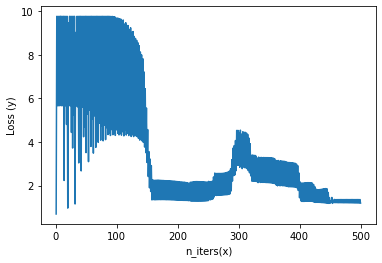

In [13]:
x = [i for i in range(1,n_iters+1)]
y = summary['cost']

plt.plot(x,y)
plt.xlabel("n_iters(x)")
plt.ylabel("Loss (y)")

### 5. Model Prediction

In [17]:
y_pred= logreg.predict(X_test)

<ipython-input-8-ccf2cf37803d>:51: RuntimeWarning: overflow encountered in exp
  y_pred_prob = 1 / (1 + np.exp(-lr_pred))


In [18]:
logreg.weights

array([ 2.66051631e-01,  4.46365173e-01,  1.58221966e+00,  9.69745519e-01,
        2.62071623e-03, -1.43922907e-04, -3.29031878e-03, -1.44265302e-03,
        5.04392426e-03,  2.02115366e-03,  1.09931978e-03,  3.24614781e-02,
       -3.51606220e-03, -6.87720460e-01,  1.75791527e-04, -1.67904665e-06,
       -1.30015092e-04,  3.93479081e-05,  5.59269411e-04,  5.58043980e-05,
        2.74525242e-01,  5.82903661e-01,  1.58893146e+00, -1.19986468e+00,
        3.40867237e-03, -1.68455714e-03, -5.77003693e-03, -1.23822904e-03,
        7.46225348e-03,  2.07057901e-03])

In [19]:
logreg.bias

0.03423590744453757

### 6. Model Evaluation

In [20]:
def accuracy(y, y_pred):
    # Model Evaluation
    return np.sum(y == y_pred)/len(y)*100

In [21]:
accuracy(y_test,y_pred)

91.22807017543859

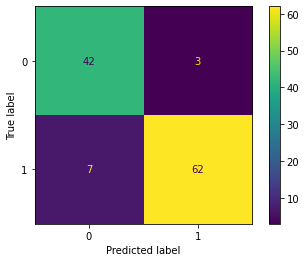

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

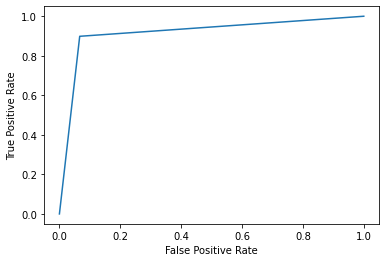

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()